<a href="https://colab.research.google.com/github/lukmanprasetyo/Business-Model-Canvas-BMC-/blob/main/PresentDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/MyDrive/dataset'

In [ ]:
%cd drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [ ]:
!kaggle datasets download -d prathamtripathi/drug-classification

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 60.1kB/s]


In [ ]:
!unzip drug-classification

Archive:  drug-classification.zip
  inflating: drug200.csv             


In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Golf.csv')
df


,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,cloudy,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,yes
6,cloudy,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [ ]:
df["Outlook"].value_counts()

sunny     5
rainy     5
cloudy    4
Name: Outlook, dtype: int64

In [1]:
print(df.head())

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [ ]:
for i in df.Outlook.values:
    if i  == 'sunny':
        df.Outlook.replace(i, 0, inplace = True)
    elif i == 'cloudy':
        df.Outlook.replace(i, 1, inplace = True)
    elif i == 'rainy':
        df.Outlook.replace(i, 2, inplace = True)

for i in df.Temperature.values:
    if i == 'hot':
        df.Temperature.replace(i, 0, inplace = True)
    elif i == 'mild':
        df.Temperature.replace(i, 1, inplace = True)
    elif i == 'cool':
        df.Temperature.replace(i, 2, inplace = True)

for i in df.Humidity.values:
    if i  == 'high':
        df.Humidity.replace(i, 0, inplace = True)
    else:
        df.Humidity.replace(i, 1, inplace = True)

for i in df.Windy.values:
    if i  == 'False':
        df.Windy.replace(i, 0, inplace = false)
    else:
        df.Windy.replace(i, 1, inplace = True)

print(cl(df, attrs = ['bold']))

    Outlook  Temperature  Humidity  Windy Play
0         0            0         1      1   no
1         0            0         1      1   no
2         1            0         1      1  yes
3         2            1         1      1  yes
4         2            2         1      1  yes
5         2            2         1      1  yes
6         1            2         1      1  yes
7         0            1         1      1   no
8         0            2         1      1  yes
9         2            1         1      1  yes
10        0            1         1      1  yes
11        1            1         1      1  yes
12        1            0         1      1  yes
13        2            1         1      1   no


In [ ]:
X_var = df[['Outlook', 'Temperature', 'Humidity', 'Windy']].values # independent variable
y_var = df['Play'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[0 0 1 1]
 [0 0 1 1]
 [1 0 1 1]
 [2 1 1 1]
 [2 2 1 1]]
Y variable samples : ['no' 'no' 'yes' 'yes' 'yes']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(11, 4)

In [ ]:
X_test.shape

(3, 4)

In [ ]:
y_train.shape

(11,)

In [ ]:
y_test.shape

(3,)

In [ ]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 67%


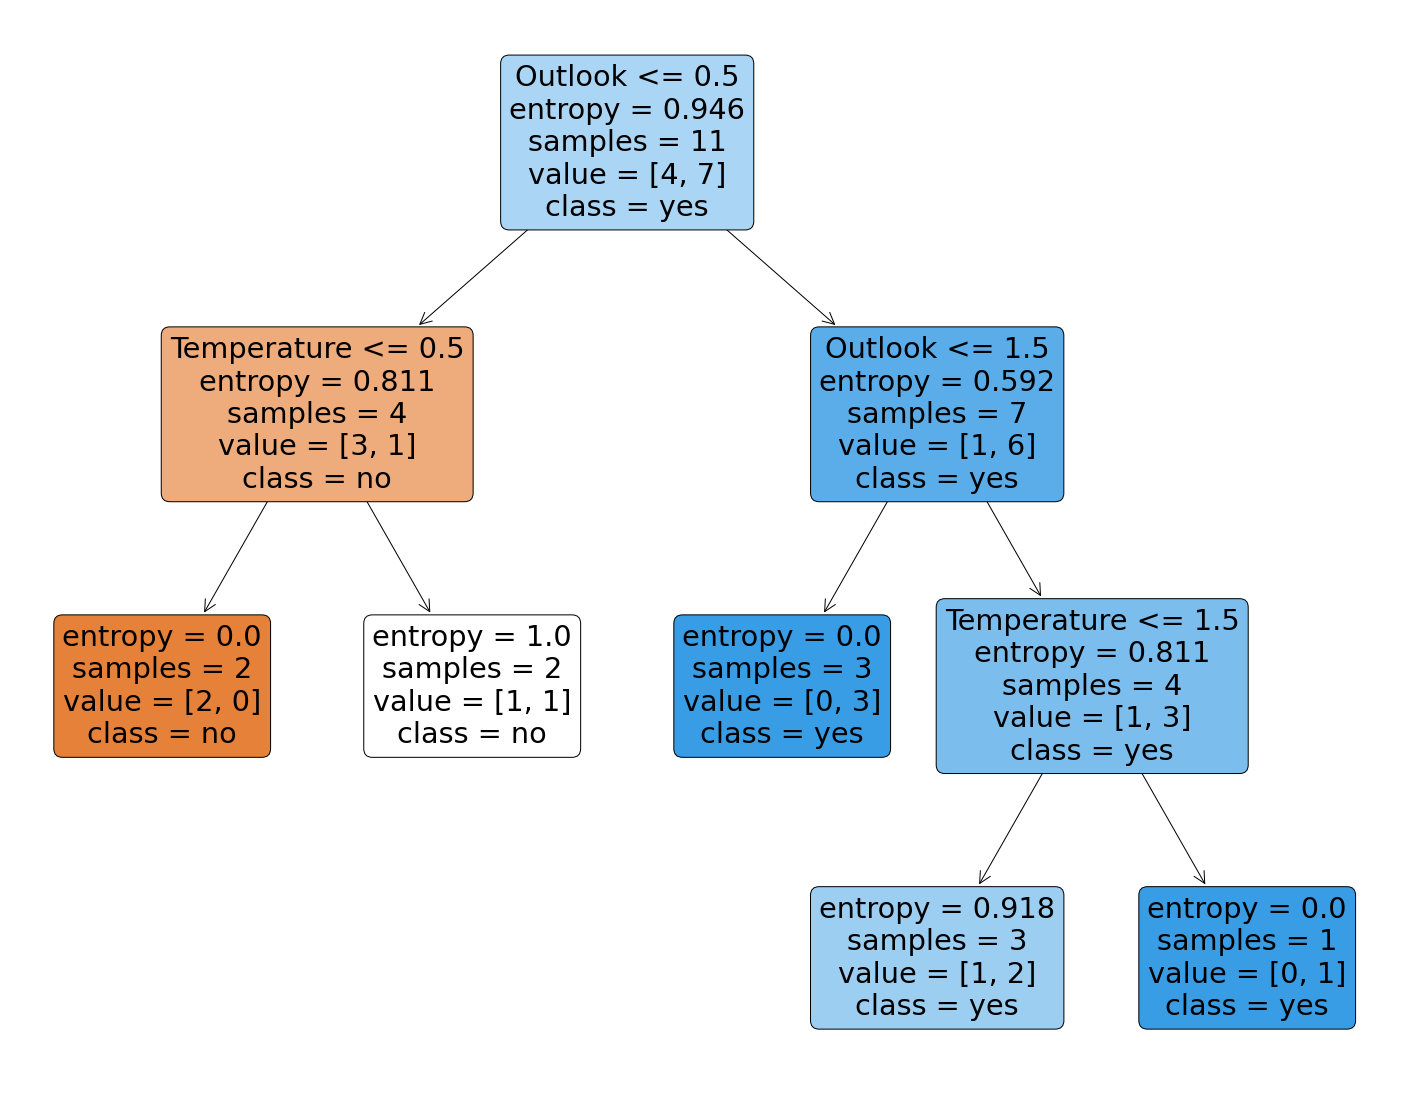

In [ ]:
feature_names = df.columns[:5]
target_names = df['Play'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 